# ----------------MODELO SUPERVISADO----------------

## Importo las librerias que voy a utilizar para el proceso

In [1]:

import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import numpy as np
import seaborn as sns

## Importo el Data Frame para el entrenamiento del modelo

In [2]:
dF_inmuebles_train=pd.read_parquet('train.parquet')

## Importo el Data Frame para la prediccion del modelo

In [3]:
dF_inmuebles_test=pd.read_parquet('test.parquet')

## Busco filas duplicadas

In [4]:
dF_inmuebles_train[dF_inmuebles_train.duplicated()]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


## Grafico para ver representado los valores faltantes

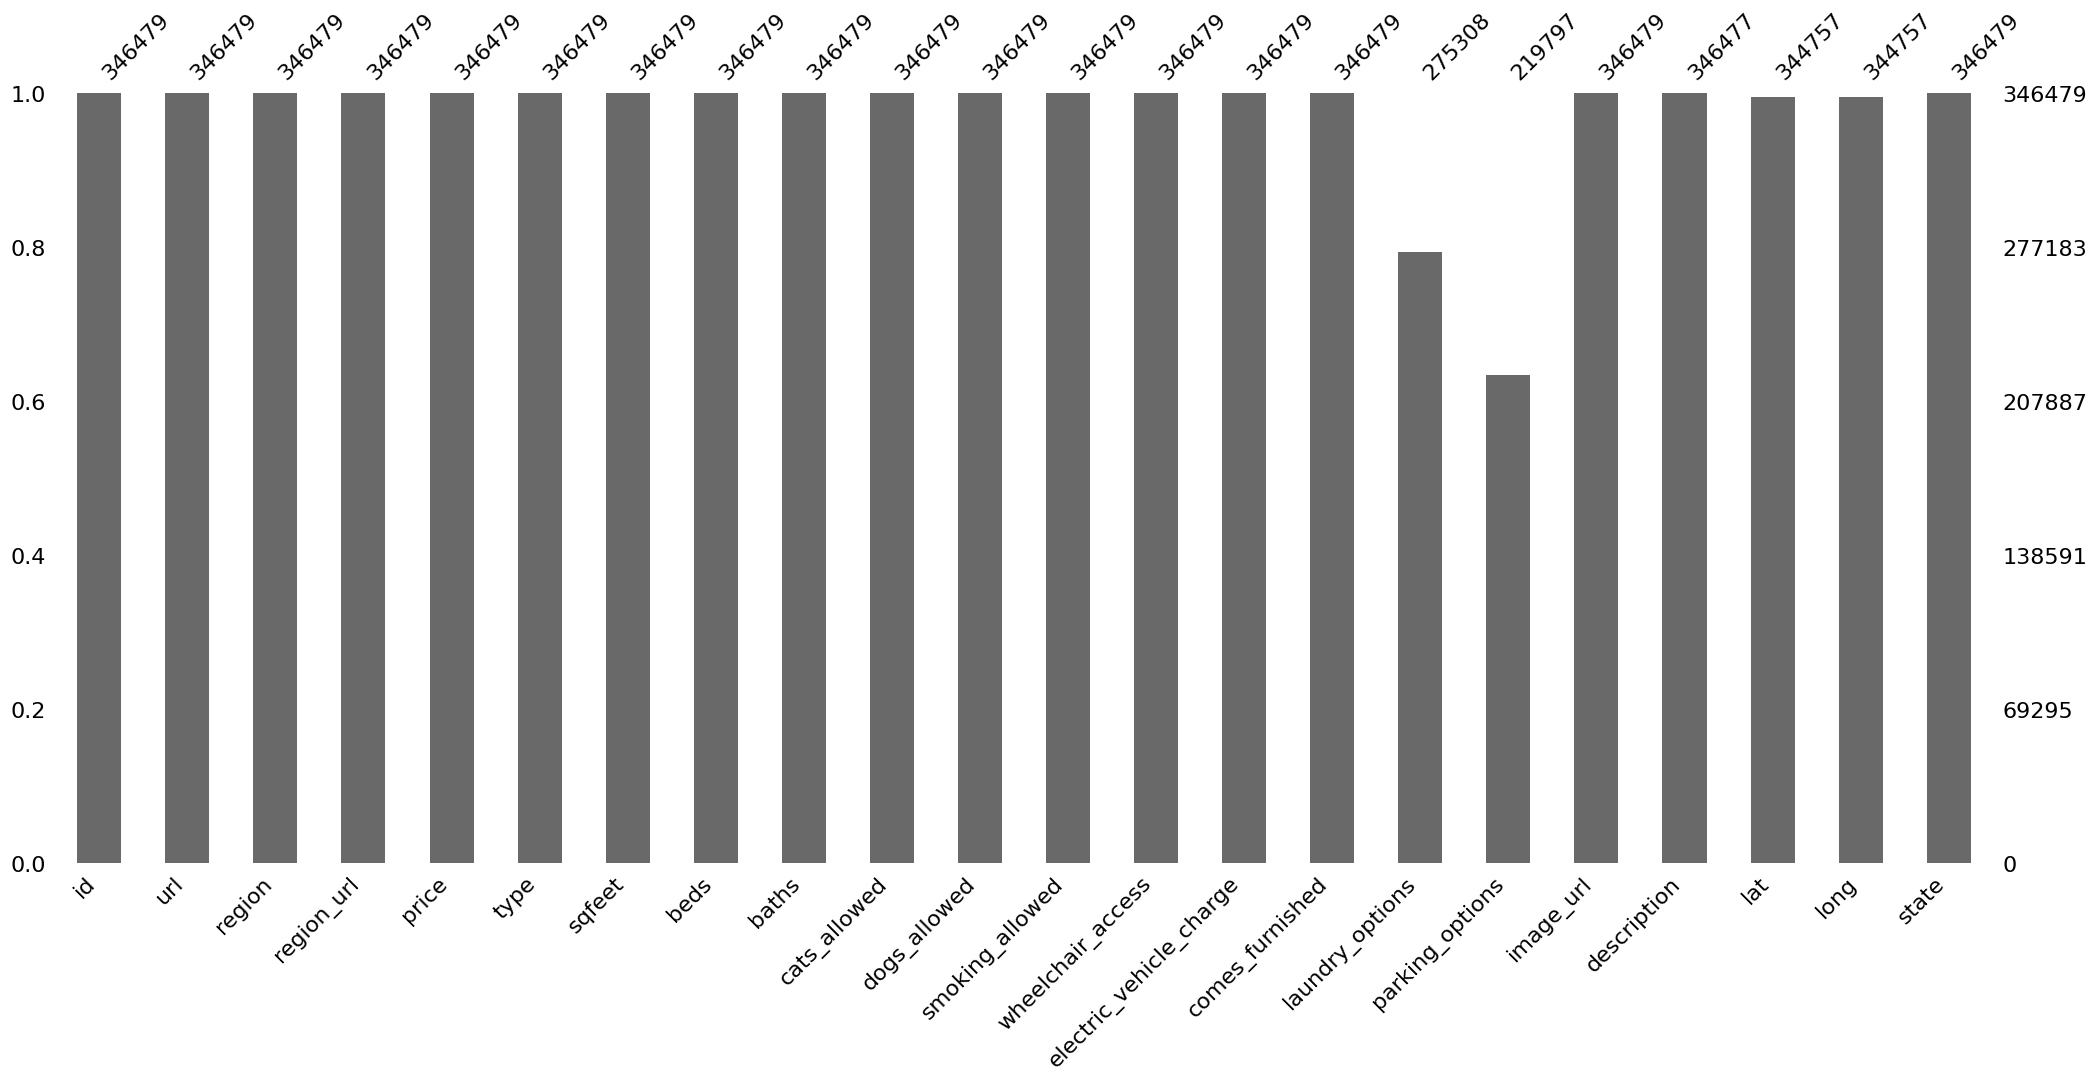

In [5]:
msno.bar(dF_inmuebles_train)
plt.show()# grafico para ver representado los valores faltantes

## Reemplazo valores faltantes de la columna 'laundry_options' y 'parking_options'

In [6]:
dF_inmuebles_train["laundry_options"].fillna('no laundry on site', inplace = True) 

In [7]:
dF_inmuebles_train["parking_options"].fillna('no parking', inplace=True)

## Vuelvo a verificar que no haya nulos

In [8]:
dF_inmuebles_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

## Creo columnas con las variables de 'laundry', 'parking' y 'type'

In [9]:
dummies_laundry=pd.get_dummies(dF_inmuebles_train.laundry_options)
dF_inmuebles_train = pd.concat([dF_inmuebles_train, dummies_laundry], axis=1,) 

In [10]:
dummies_parking=pd.get_dummies(dF_inmuebles_train.parking_options)
dF_inmuebles_train = pd.concat([dF_inmuebles_train, dummies_parking], axis=1,) 

In [11]:
dummies_type=pd.get_dummies(dF_inmuebles_train.type)
dF_inmuebles_train = pd.concat([dF_inmuebles_train, dummies_type], axis=1,) 

## Verifico como quedo el Data Set

In [12]:
dF_inmuebles_train.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,condo,cottage/cabin,duplex,flat,house,in-law,land,loft,manufactured,townhouse
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,0,1,0,0,0,0,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,0,0,0,0,0,0,0


## Elimino las columnas que ya no voy a utilizar con variables cualitativas.

In [13]:
del dF_inmuebles_train['laundry_options']
del dF_inmuebles_train['parking_options']
del dF_inmuebles_train['type'] 

## Busco valores atipicos en la columna price donde observo un valor extremadamente alto

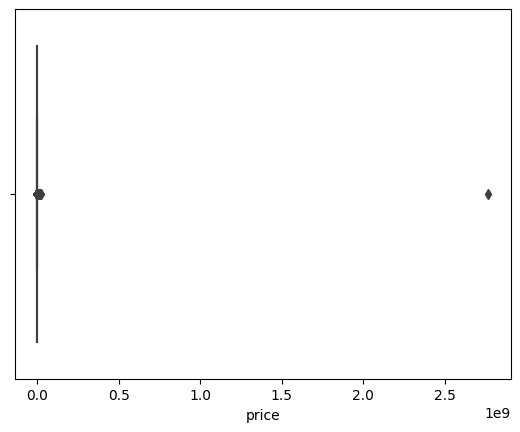

In [14]:
sns.boxplot(x = 'price', data = dF_inmuebles_train)
plt.show()

## Uso la tecnica rango intercuantilico para la eliminacion de outliers en la columna price, ya que la misma es de importancia para la prediccion

In [15]:
Q1 = dF_inmuebles_train['price'].quantile(0.25)
Q3 = dF_inmuebles_train['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

805.0
1395.0
590.0
-80.0
2280.0


In [16]:
print('Cantidad de registros totales:', dF_inmuebles_train.shape[0])
print('Cantidad de outliers:', dF_inmuebles_train[(dF_inmuebles_train['price']<BI) | (dF_inmuebles_train['price']>BS)].shape[0] )

Cantidad de registros totales: 346479
Cantidad de outliers: 16903


## Elimino outliers columna price

In [17]:
price_sin_outlier = (dF_inmuebles_train['price']<BI) | (dF_inmuebles_train['price']>BS) #eliminamos outliers columna price
dF_inmuebles_train = dF_inmuebles_train[~price_sin_outlier]

## Busco valores atipicos en la columna 'sqfeet'

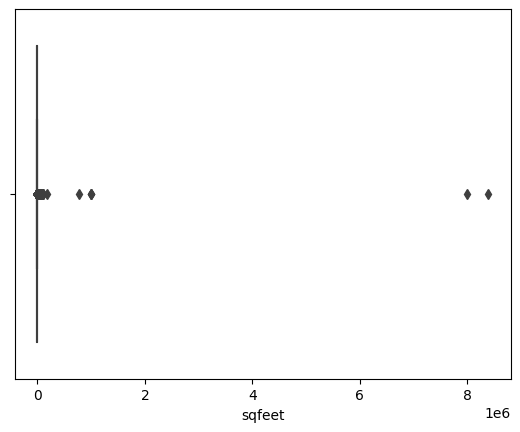

In [18]:
sns.boxplot(x = 'sqfeet', data = dF_inmuebles_train)
plt.show()

## Uso la tecnica rango intercuantilico para la eliminacion de outliers en la columna sqfeet

In [19]:

Q1 = dF_inmuebles_train['sqfeet'].quantile(0.25)
Q3 = dF_inmuebles_train['sqfeet'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

750.0
1125.0
375.0
187.5
1687.5


In [20]:
print('Cantidad de registros totales:', dF_inmuebles_train.shape[0])
print('Cantidad de outliers:', dF_inmuebles_train[(dF_inmuebles_train['sqfeet']<BI) | (dF_inmuebles_train['sqfeet']>BS)].shape[0] )

Cantidad de registros totales: 329576
Cantidad de outliers: 13019


## Elimino outliers de sqfeet

In [21]:
sqfeet_sin_outlier = (dF_inmuebles_train['sqfeet']<BI) | (dF_inmuebles_train['sqfeet']>BS) 

dF_inmuebles_train = dF_inmuebles_train[~sqfeet_sin_outlier]

In [22]:
dF_inmuebles_train.shape[0]

316557

## Elimino columnas que no voy a utilizar

In [23]:
dF_inmuebles_train.drop(['url', 'region_url','image_url','lat','long','state','region','description'], axis = 'columns', inplace=True)

## Vuelvo a ver el Data Set

In [24]:
dF_inmuebles_train.head(3)

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,condo,cottage/cabin,duplex,flat,house,in-law,land,loft,manufactured,townhouse
0,7048013474,1350,1200,2,2.0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7043931179,1115,694,1,1.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7048254516,1129,900,2,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Defino la columna category_price

In [25]:
dF_inmuebles_train['category_price'] = np.where(dF_inmuebles_train['price']<=999, 1, 0)

## Defino una función para ayudarme a graficar un heatmap de correlación

In [26]:
def plot_corre_heatmap(corr):
    
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    plt.show()

## Visualizo el mapa de correlacion

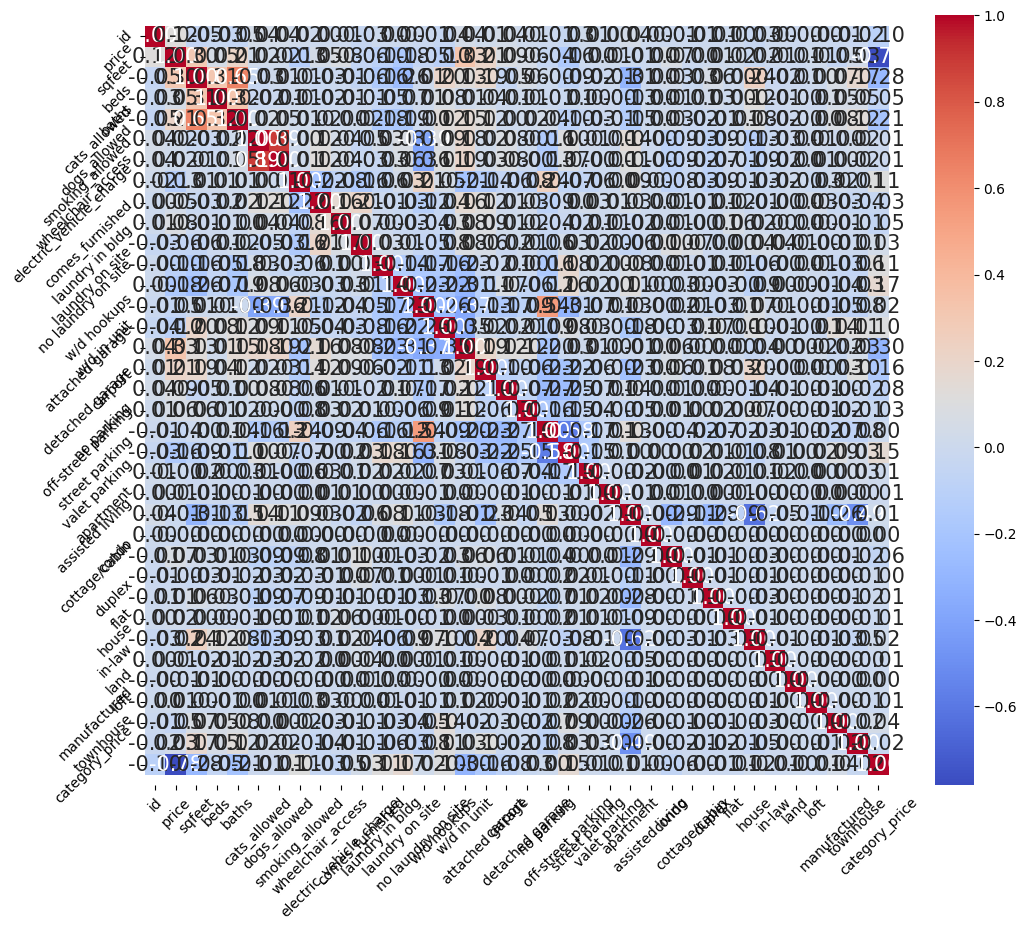

In [27]:
corr = dF_inmuebles_train.corr()
plot_corre_heatmap(corr)

## Elimino la columna price ya que no esta en data frame de testeo

In [28]:
dF_inmuebles_train.drop(['price'], axis = 'columns', inplace=True)

## Genero variables Dummies en el Dta Set de Testeo.

In [29]:
dummies_laundry=pd.get_dummies(dF_inmuebles_test.laundry_options)
dF_inmuebles_test = pd.concat([dF_inmuebles_test, dummies_laundry], axis=1,) 

dummies_laundry=pd.get_dummies(dF_inmuebles_test.parking_options)
dF_inmuebles_test = pd.concat([dF_inmuebles_test, dummies_laundry], axis=1,) 

dummies_laundry=pd.get_dummies(dF_inmuebles_test.type)
dF_inmuebles_test = pd.concat([dF_inmuebles_test, dummies_laundry], axis=1,) 

## Elimino las mismas columnas que elimine en el data frame de entrenamiento

In [32]:
dF_inmuebles_test.drop(['type', 'parking_options', 'laundry_options','url', 'region_url','image_url','lat','long','state','region','description'
                        ], axis = 'columns', inplace=True)

## Defino las variables x e y para el entrenamiento y defino la columna a predecir

In [33]:
X = dF_inmuebles_train[['sqfeet','baths','beds','cats_allowed','wheelchair_access','laundry in bldg', 'laundry on site', 'no laundry on site',
                        'w/d hookups','w/d in unit', 'attached garage', 'carport', 'detached garage', 'no parking', 'off-street parking', 'street parking',
                        'valet parking', 'apartment', 'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft','manufactured', 'townhouse', 'dogs_allowed']]
y = dF_inmuebles_train['category_price'] 

## Hago la separacion entre datos de entrenamiento y datos de testeo

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## Importo para utilizar el objeto que me va a permitir predecir con el metodo arbol

In [35]:
from sklearn.tree import DecisionTreeClassifier

## Importo lo necesario para buscar la profundidad mas optima para mi modelo

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

## Hago una funcion para evaluar cual profundidad del arbol seria mas efectiva

In [ ]:
tree_train_scores_mean = [] 
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


## Grafico los  resultados de la funcion para poder observar que profundidad es mas efectiva en el arbol

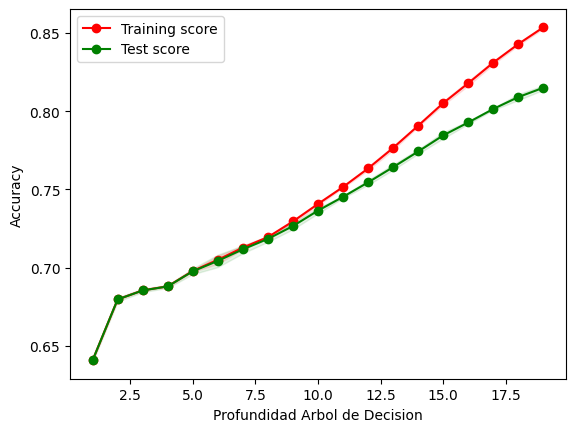

In [ ]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

## Paso hiperparametro de profundidad, en el valor que vi mas acertado en el modelo de testeo

In [37]:
arbol = DecisionTreeClassifier(max_depth = 10)

In [38]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## Predigo sobre el set de entrenamieto y el set de testeo y comparo etiquetas reales.

In [39]:
from sklearn.metrics import accuracy_score

y_train_pred = arbol.predict(X_train)

y_test_pred = arbol.predict(X_test)

print('Porcentaje de aciertos sobre el conjunto de Entrenamiento:', accuracy_score(y_train_pred,y_train))
print('Porcentaje de aciertos sobre el conjunto de Evaluación:', accuracy_score(y_test_pred,y_test))

Porcentaje de aciertos sobre el conjunto de Entrenamiento: 0.740058046555707
Porcentaje de aciertos sobre el conjunto de Evaluación: 0.7355319686631286


## Defino las columnas a utilizar para el test de prediccion

In [40]:
X_test2= dF_inmuebles_test[['sqfeet','baths','beds','cats_allowed','wheelchair_access','laundry in bldg', 'laundry on site', 'no laundry on site',
                        'w/d hookups','w/d in unit', 'attached garage', 'carport', 'detached garage', 'no parking', 'off-street parking', 'street parking',
                        'valet parking', 'apartment', 'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft','manufactured', 'townhouse', 'dogs_allowed']]#defino las columnas a utilizar para el test de prediccion


## Hago laprediccion sobre el data frame de testeo

In [41]:
pred_test=arbol.predict(X_test2)

In [42]:
pred_test

array([0, 1, 0, ..., 0, 0, 1])

## Transformo el array del resultado de la prediccion en un data frame

In [44]:
prediccion=pd.DataFrame(pred_test)

## Llamo a la columna de predicion 'pred'

In [45]:
prediccion.columns = ['pred']

## Convierto el data frame a un archivo csv sin el indice

In [55]:
prediccion.to_csv('juangarciare.csv', index=False)